# CNN Model

# Import All Necessary Libraries and Create File Paths

In [1]:
import os
import sys
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Modelling CNN
import tensorflow as tf
import glob
import math
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
# folder path or file path constants that will be used in this project
# Root Directory (between 'F:' or 'D:'' depends on the external drive)
ROOT = "D:"

# Folder inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_DATASET_FOLDER_PATH = f"{ROOT}\\wildfire-sumatera-dataset"


# Folders and metadatas inside D:\\wildfire-sumatera-dataset
WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH        = f"{WILDFIRE_SUMATERA_DATASET_FOLDER_PATH}\\wildfire-sumatera-geotiff"
WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH           = f"{WILDFIRE_SUMATERA_DATASET_FOLDER_PATH}\\wildfire-sumatera-image"
WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH      = f"{WILDFIRE_SUMATERA_DATASET_FOLDER_PATH}\\wildfire-sumatera-image-mask"

# Files (.csv) and metadatas inside D:\\wildfire-sumatera-dataset
METADATA_LANDSAT_8_FILE_PATH  = f"{WILDFIRE_SUMATERA_DATASET_FOLDER_PATH}\\metadata_landsat_8.csv"
METADATA_SENTINEL_2_FILE_PATH = f"{WILDFIRE_SUMATERA_DATASET_FOLDER_PATH}\\metadata_sentinel_2.csv"

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff
SENTINEL_2_GEOTIFF_FOLDER_PATH = f"{WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH}\\sentinel-2"
LANDSAT_8_GEOTIFF_FOLDER_PATH  = f"{WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH}\\landsat-8"

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image
SENTINEL_2_IMAGE_FOLDER_PATH = f"{WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH}\\sentinel-2"
LANDSAT_8_IMAGE_FOLDER_PATH  = f"{WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH}\\landsat-8"

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\landsat-8
LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH  = f"{LANDSAT_8_GEOTIFF_FOLDER_PATH}\\prefire"
LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH = f"{LANDSAT_8_GEOTIFF_FOLDER_PATH}\\postfire"

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-geotiff\\sentinel-2
SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH  = f"{SENTINEL_2_GEOTIFF_FOLDER_PATH}\\prefire"
SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH = f"{SENTINEL_2_GEOTIFF_FOLDER_PATH}\\postfire"

# Folders inside D:\\wildfire-sumatera-dataset\\wildfire-sumatera-image-mask
SENTINEL_2_IMAGE_MASK_FOLDER_PATH = f"{WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH}\\sentinel-2"
LANDSAT_8_IMAGE_MASK_FOLDER_PATH  = f"{WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH}\\landsat-8"

dirs = [
    WILDFIRE_SUMATERA_DATASET_FOLDER_PATH,
    WILDFIRE_SUMATERA_GEOTIFF_FOLDER_PATH, 
    WILDFIRE_SUMATERA_IMAGE_FOLDER_PATH,
    WILDFIRE_SUMATERA_IMAGE_MASK_FOLDER_PATH,
    
    SENTINEL_2_GEOTIFF_FOLDER_PATH, 
    LANDSAT_8_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_IMAGE_FOLDER_PATH,
    LANDSAT_8_IMAGE_FOLDER_PATH,
    
    LANDSAT_8_PREFIRE_GEOTIFF_FOLDER_PATH,
    LANDSAT_8_POSTFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_PREFIRE_GEOTIFF_FOLDER_PATH,
    SENTINEL_2_POSTFIRE_GEOTIFF_FOLDER_PATH,
    
    SENTINEL_2_IMAGE_MASK_FOLDER_PATH,
    LANDSAT_8_IMAGE_MASK_FOLDER_PATH,
]

for dir_ in dirs:
    if not os.path.exists(dir_):
        os.mkdir(dir_)
        print(f"{dir_} has been created")
    else:
        print(f"{dir_} already exist")

D:\wildfire-sumatera-dataset already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image\sentinel-2 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image\landsat-8 already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\prefire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\landsat-8\postfire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\prefire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-geotiff\sentinel-2\postfire already exist
D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\sentinel-2 already exist


# Constants

In [3]:
RANDOM_STATE = 42
BATCH_SIZE = 32
SEED = RANDOM_STATE
WIDTH = 128
HEIGHT = 128
CHANNEL = 3
INPUT_SHAPE = (HEIGHT, WIDTH, CHANNEL)
TEST_SIZE = 0.2

# Prepare Data

# Create Machine Learning Model

In [4]:
landsat_df = pd.read_csv(os.path.join(WILDFIRE_SUMATERA_DATASET_FOLDER_PATH, 'metadata_landsat_8_new.csv'))
# filtered_landsat_df = landsat_df[(landsat_df['image_condition']==1) & landsat_df['class_by_median']==1]
filtered_landsat_df = landsat_df[(landsat_df['image_condition']==1)]

In [5]:
# load paths
image_paths = []
mask_paths = []
for index, row in tqdm(filtered_landsat_df.iterrows()):
    image_paths.append(os.path.join(ROOT, row['folder_paths_image_mask'], 'image.png'))
    mask_paths.append(os.path.join(ROOT, row['folder_paths_image_mask'], 'cleaned_mask.png'))

x_train, x_val_test, y_train, y_val_test = train_test_split(
    image_paths,
    mask_paths,
    shuffle=True,
    train_size=0.8,
    random_state=RANDOM_STATE
)

x_val, x_test, y_val, y_test = train_test_split(
    x_val_test,
    y_val_test,
    shuffle=True,
    train_size=0.5,
    random_state=RANDOM_STATE
)

# put all of the images paths and their masks path into tf data format
tf_train_image_mask_paths = tf.data.Dataset.from_tensor_slices((x_train, y_train))
tf_val_image_mask_paths = tf.data.Dataset.from_tensor_slices((x_val, y_val))
tf_test_image_mask_paths = tf.data.Dataset.from_tensor_slices((x_test, y_test))

print("\033[1m"+"train paths"+"\033[0m")
for path in tf_train_image_mask_paths.take(5):
    print('image path = ', path[0].numpy().decode('utf_8'))
    print('mask path = ', path[1].numpy().decode('utf_8'))
    
print("\033[1m"+"validation paths"+"\033[0m")
for path in tf_val_image_mask_paths.take(5):
    print('image path = ', path[0].numpy().decode('utf_8'))
    print('mask path = ', path[1].numpy().decode('utf_8'))

print("\033[1m"+"test paths""\033[0m")
for path in tf_test_image_mask_paths.take(5):
    print('image path = ', path[0].numpy().decode('utf_8'))
    print('mask path = ', path[1].numpy().decode('utf_8'))

7836it [00:00, 23745.31it/s]


train paths
image path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5027\image.png
mask path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5027\cleaned_mask.png
image path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6506\image.png
mask path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6506\cleaned_mask.png
image path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5108\image.png
mask path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\5108\cleaned_mask.png
image path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6530\image.png
mask path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\6530\cleaned_mask.png
image path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7040\image.png
mask path =  D:\wildfire-sumatera-dataset\wildfire-sumatera-image-mask\landsat-8\7040\clean

In [6]:
def normalize_image(image, mask):    
    image = tf.cast(image, tf.float32)/ 255.0
    mask = mask / 255
    return image, tf.cast(mask, tf.uint8)

def resize_image_mask(image, mask):
    image = tf.image.resize(image, (WIDTH, HEIGHT), method='nearest')
    mask = tf.image.resize(mask, (WIDTH, HEIGHT), method='nearest')
    return image, mask

def augment_image_mask(image, mask):
    if tf.random.uniform(()) > 0.5:
        # Random flipping of the image and mask
        image = tf.image.flip_left_right(image)
        mask = tf.image.flip_left_right(mask)
        
    if tf.random.uniform(()) > 0.5:
        # Random flipping of the image and mask
        image = tf.image.flip_up_down(image)
        mask = tf.image.flip_up_down(mask)
        
    return image, mask

def load_image_mask(image_path, mask_path):
    # read the image file
    image = tf.io.read_file(image_path)
    # decode the image which is in .png format
    image = tf.io.decode_png(image)
    
    # read the mask file
    mask = tf.io.read_file(mask_path)
    # decode the mask which is in .png format
    mask = tf.io.decode_png(mask)
    return image, mask

In [17]:
def prepare_train_dataset(paths):
    # get all images and masks
    dataset = paths.map(load_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    # normalize only images
    dataset = dataset.map(normalize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    # data augmentation process for images and masks
    augmentation_layers = tf.keras.Sequential([
        tf.keras.layers.Resizing(height=HEIGHT, width=WIDTH),
        tf.keras.layers.RandomRotation(factor=0.2, seed=SEED),
        tf.keras.layers.RandomFlip(seed=SEED),
        tf.keras.layers.RandomZoom(
            height_factor=(-0.2, -0.2), #zoomed height in between 5% to 20%
            width_factor=(-0.2, -0.2),
            seed=SEED), #zoomed width in between 5% to 20%
        tf.keras.layers.RandomTranslation(
            height_factor=(-0.2, 0.2), #shifted down by 20% and up by 20%
            width_factor=(-0.2, 0.2), 
            seed=SEED), #shifted left by 20% and right by 20%
    ])
    dataset = dataset.map(lambda image, mask: (augmentation_layers(image), augmentation_layers(mask)) ,
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)

    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

def prepare_test_dataset(paths):
    # get all images and masks
    dataset = paths.map(load_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    # normalize only images
    dataset = dataset.map(normalize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    # data augmentation process for images and masks
    augmentation_layers = tf.keras.Sequential([
        tf.keras.layers.Resizing(height=HEIGHT, width=WIDTH),
    ])
    dataset = dataset.map(lambda image, mask: (augmentation_layers(image), augmentation_layers(mask)) ,
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

In [18]:
# def prepare_dataset(paths):
#     # get all images and masks
#     dataset = paths.map(load_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
#     # resize images and masks
#     dataset = dataset.map(resize_image_mask, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
#     # normalize only images
#     dataset = dataset.map(normalize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
#     # data augmentation process for images and masks
#     dataset = dataset.map(augment_image_mask,
#                           num_parallel_calls=tf.data.experimental.AUTOTUNE).cache()
    
#     dataset = dataset.batch(BATCH_SIZE)
#     dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
#     return dataset

In [19]:
# get all images and masks
train_dataset = prepare_train_dataset(tf_train_image_mask_paths)
val_dataset = prepare_test_dataset(tf_val_image_mask_paths)
test_dataset = prepare_test_dataset(tf_test_image_mask_paths) 

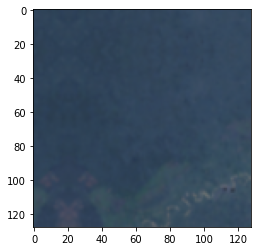

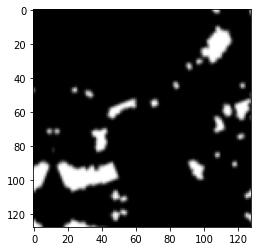

In [20]:
for d in train_dataset.take(1):
    image = d[0][31].numpy()
    mask = d[1][31].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

In [21]:
val_dataset.take(2)

<TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, None), dtype=tf.float32, name=None))>

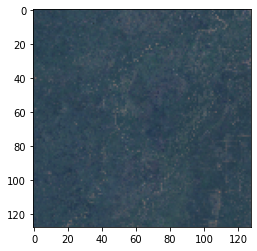

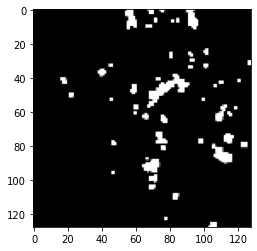

In [22]:
for d in val_dataset.take(1):
    image = d[0][31].numpy()
    mask = d[1][31].numpy()
    plt.imshow(image*3)
    plt.show()
    plt.imshow(mask, cmap='gray')
    plt.show()

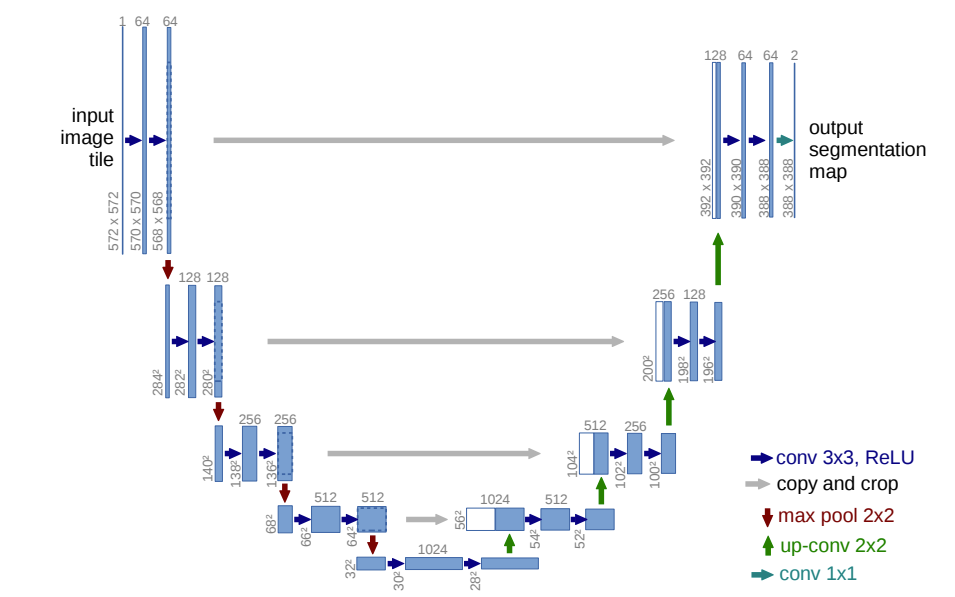

In [23]:
def double_conv_block(x, n_filters):
    x = tf.keras.layers.Conv2D(filters=n_filters,
                               kernel_size=(3, 3),
                               activation=tf.nn.relu,
                               padding='same',
                               kernel_initializer='he_normal',
                              )(x)
    x = tf.keras.layers.Conv2D(filters=n_filters,
                               kernel_size=(3, 3),
                               activation=tf.nn.relu,
                               padding='same',
                               kernel_initializer='he_normal',
                              )(x)
    return x
    
def downsample_conv_block(x, n_filters):
    c = double_conv_block(x, n_filters)
    p = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(c)
    p = tf.keras.layers.Dropout(0.3)(p)
    return c, p


def upsample_conv_block(x, conv_features, n_filters):
    x = tf.keras.layers.Conv2DTranspose(filters=n_filters,
                                        kernel_size=(3, 3),
                                        strides=(2, 2),
                                        padding='same',)(x)
    x = tf.keras.layers.concatenate([x, conv_features])
    x = tf.keras.layers.Dropout(0.3)(x)
    x = double_conv_block(x, n_filters)
    return x

    
def get_model(input_shape, starting_filter, factor=2):
    # input to the model     
    inputs = tf.keras.layers.Input(shape=input_shape)
    
    # encoder: contracting path - downsample
    # downsample conv block - 1
    c1, p1 = downsample_conv_block(inputs, n_filters=int(starting_filter*math.pow(factor,0)))
    # downsample conv block - 2
    c2, p2 = downsample_conv_block(p1, n_filters=int(starting_filter*math.pow(factor,1)))
    # downsample conv block - 3
    c3, p3 = downsample_conv_block(p2, n_filters=int(starting_filter*math.pow(factor,2)))
    # downsample conv block - 4
    c4, p4 = downsample_conv_block(p3, n_filters=int(starting_filter*math.pow(factor,3)))
    
    # downsample conv block - 5 (Bottleneck)
    bottleneck = double_conv_block(p4, n_filters=int(starting_filter*math.pow(factor,4)))
    
    # decoder: expanding path - upsample
    # upsample conv block - 1
    u1 = upsample_conv_block(bottleneck, c4, n_filters=int(starting_filter*math.pow(factor,3)))
    # upsample conv block - 2
    u2 = upsample_conv_block(u1, c3, n_filters=int(starting_filter*math.pow(factor,2)))
    # upsample conv block - 3
    u3 = upsample_conv_block(u2, c2, n_filters=int(starting_filter*math.pow(factor,1)))
    # upsample conv block - 4
    u4 = upsample_conv_block(u3, c1, n_filters=int(starting_filter*math.pow(factor,0)))
    
    # output
    outputs = tf.keras.layers.Conv2D(filters=1,
                                     kernel_size=(1, 1),
                                     activation='sigmoid')(u4)
    
    unet_model = tf.keras.Model(inputs, outputs, name='unet-model')
    return unet_model

In [24]:
# inputs = tf.keras.layers.Input(INPUT_SHAPE)

# #Contraction path
# c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
# c1 = tf.keras.layers.Dropout(0.1)(c1)
# c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
# p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

# c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
# c2 = tf.keras.layers.Dropout(0.1)(c2)
# c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
# p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
# c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
# c3 = tf.keras.layers.Dropout(0.2)(c3)
# c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
# p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
# c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
# c4 = tf.keras.layers.Dropout(0.2)(c4)
# c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
# p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
# c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
# c5 = tf.keras.layers.Dropout(0.3)(c5)
# c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

# #Expansive path 
# u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
# u6 = tf.keras.layers.concatenate([u6, c4])
# c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
# c6 = tf.keras.layers.Dropout(0.2)(c6)
# c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
# u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
# u7 = tf.keras.layers.concatenate([u7, c3])
# c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
# c7 = tf.keras.layers.Dropout(0.2)(c7)
# c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
# u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
# u8 = tf.keras.layers.concatenate([u8, c2])
# c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
# c8 = tf.keras.layers.Dropout(0.1)(c8)
# c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
# u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
# u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
# c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
# c9 = tf.keras.layers.Dropout(0.1)(c9)
# c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
# outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
# unet_model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
# unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Create Model
unet_model = get_model(
    input_shape=INPUT_SHAPE,
    starting_filter=16,
)
# Compile Model
unet_model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
display(unet_model.summary())

Model: "unet-model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 16  2320        ['conv2d[0][0]']                 
                                )                                                        

 concatenate_3 (Concatenate)    (None, 128, 128, 32  0           ['conv2d_transpose_3[0][0]',     
                                )                                 'conv2d_1[0][0]']               
                                                                                                  
 dropout_7 (Dropout)            (None, 128, 128, 32  0           ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_16 (Conv2D)             (None, 128, 128, 16  4624        ['dropout_7[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_17 (Conv2D)             (None, 128, 128, 16  2320        ['conv2d_16[0][0]']              
          

None

In [26]:
physical_devices = tf.config.list_physical_devices('GPU')
print("{} GPU(s) is avalilable".format(len(physical_devices)) if len(physical_devices) else "GPU is not avalailable")
print("GPU name: {}".format(physical_devices))

1 GPU(s) is avalilable
GPU name: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Limiting GPU memory growth

In [27]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)
        
tf.debugging.set_log_device_placement(True)

1 Physical GPUs, 1 Logical GPU


In [28]:
history = unet_model.fit(
    train_dataset,
    epochs=5,
    validation_data=val_dataset,
)

Epoch 1/5
 27/196 [===>..........................] - ETA: 44s - loss: 0.6044 - accuracy: 0.7226

KeyboardInterrupt: 

In [ ]:
def evaluate_model(history):
    plt.figure(figsize=(10, 15))
    plt.subplot(211)
    plt.title('Accuracy vs Validation Accuracy')
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 15))
    plt.subplot(212)
    plt.title('Loss vs Validation Loss')
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.legend()
    plt.show()

In [ ]:
evaluate_model(history)

In [ ]:
result = unet_model.predict(test_dataset)

In [ ]:
result.shape

In [ ]:
def display_image_prediction(dataset, result_mask):
    for batch in dataset.take(1):
        fig, axs = plt.subplots(10, 3, figsize=(10, 40), sharey=True)
        for i in range(10):
            image = batch[0][i].numpy()
            true_mask = batch[1][i].numpy()
            predicted_mask = result_mask[i]
            axs[i, 0].imshow(image*3)
            axs[i, 0].set_title('image')
            axs[i, 1].imshow(mask, cmap='gray')
            axs[i, 1].set_title('mask')
            axs[i, 2].imshow(predicted_mask, cmap='gray')
            axs[i, 2].set_title('mask')
        plt.show()

In [ ]:
display_image_prediction(test_dataset, result)

In [120]:
for t in test_dataset:
    print(t)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[0.05490196, 0.08235294, 0.11372549],
         [0.05882353, 0.07843138, 0.10196079],
         [0.05098039, 0.07843138, 0.09803922],
         ...,
         [0.04705882, 0.07450981, 0.10980392],
         [0.04705882, 0.07450981, 0.10588235],
         [0.04313726, 0.07058824, 0.09411765]],

        [[0.06666667, 0.09411765, 0.11764706],
         [0.0627451 , 0.09019608, 0.10588235],
         [0.05490196, 0.07843138, 0.10196079],
         ...,
         [0.05882353, 0.08627451, 0.11372549],
         [0.04313726, 0.06666667, 0.09803922],
         [0.04705882, 0.07058824, 0.09803922]],

        [[0.0627451 , 0.09019608, 0.10980392],
         [0.0627451 , 0.09019608, 0.10588235],
         [0.05882353, 0.08627451, 0.10196079],
         ...,
         [0.05490196, 0.07843138, 0.10980392],
         [0.04313726, 0.06666667, 0.10588235],
         [0.05490196, 0.07843138, 0.10588235]],

        ...,

        [[0.05490196, 0.08627451